# Discussion 07

### Neural Networks and Function Approximation

Welcome to Discussion 07.

We often think of neural networks in the context of classification, but they can be used for non-linear regression, too. In fact, as we saw in lecture, neural networks are *universal function approximators*; they can approximate any (reasonably well-behaved) function to an arbitrary degree of precision, provided that the network has a sufficient number of hidden neurons with a suitable, non-linear activation.

In [1]:
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Ocean Temperatures

The data set loaded below contains the ocean temperature measured in La Jolla on every day since August 1916. To reduce noise, we'll take the rolling mean with a window of 24 months.

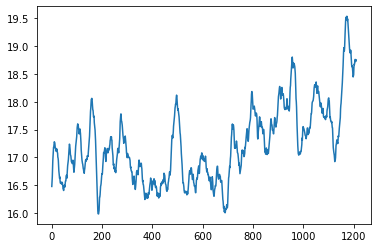

In [2]:
temperatures = pd.read_csv('sea_temp.csv').groupby(['YEAR', 'MONTH']).mean()['SURFACE_TEMP']
temperatures = temperatures.rolling(24).mean().dropna().values

plt.plot(temperatures)

Let's train a deep neural network to approximate this function.

**Question 1**. What activation function is the best choice for the output layer?

_Type your answer here, replacing this text._

**Solution**: linear activation

**Question 2.** Which activation function is a good choice for the hidden layers?

_Type your answer here, replacing this text._

**Solution**: The ReLU is the "default" choice, although we will see that it isn't great in this situation.

**Question 3.** What loss function should be used?

_Type your answer here, replacing this text._

**Solution**: mean squared error

**Question 4.** Train a neural network with no hidden layer and using a linear activation function for the output layer and the mean squared error as the cost function. For the predictor (x) variable, use:

In [3]:
x = np.linspace(0, 1, len(temperatures))

In [ ]:
# BEGIN SOLUTION
inputs = keras.Input(1)
outputs = keras.layers.Dense(1, activation='linear')(inputs)

model = keras.Model(inputs, outputs)
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=.001),
    loss=keras.losses.MeanSquaredError()
)
model.fit(x, temperatures, epochs=1000)
# END SOLUTION

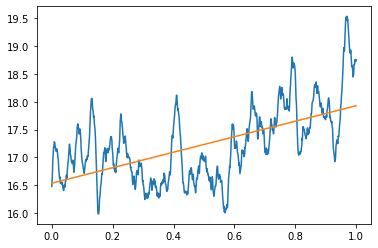

In [5]:
plt.plot(x, temperatures)
plt.plot(x, model(x))

**Question 5**. True or false. This model is exactly the same as the least squares regression model.

_Type your answer here, replacing this text._

**Solution**: True. Although we typically learn a least squares regression model by solving the normal equations, we could also use gradient descent. This is exactly what the above is doing.

**Question 6.** Train a neural network with one hidden layer and 10 neurons in the hidden layer. Use a ReLU activation in the hidden layer.

In [ ]:
# BEGIN SOLUTION
inputs = keras.Input(1)
hidden = keras.layers.Dense(10, activation='relu')(inputs)
outputs = keras.layers.Dense(1, activation='linear')(hidden)

model = keras.Model(inputs, outputs)
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=.001),
    loss=keras.losses.MeanSquaredError()
)
model.fit(x, temperatures, epochs=1000)
# END SOLUTION

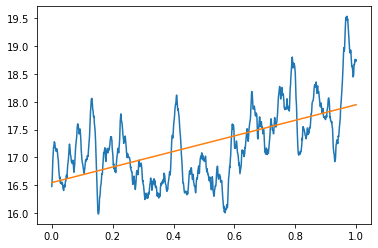

In [7]:
plt.plot(x, temperatures)
plt.plot(x, model(x))

**Question 7**. Chances are your prediction function looks linear, despite using a non-linear activation function in the hidden layer. Why do you think this is?

_Type your answer here, replacing this text._

**Solution** The solution is a sum of ReLUs. The sum of ReLUs is non-linear in general. However, when a ReLU is active, it looks linear; if all of the ReLUs are active across the domain of `x`, then the resulting sum will look linear.

This solution (with all ReLUs active), is likely not the *global* minimum, but it is a local minimum. What we see is the optimization getting stuck in a local optimum.

**Question 8.** Train a deep NN with three hidden layers, each with 20 nodes, using the ReLU as the hidden layers' activation function. Try repeating the training several times to see how much your results vary. Why do they vary?

In [ ]:
# BEGIN SOLUTION
inputs = keras.Input(1)
hidden_1 = keras.layers.Dense(20, activation='relu')(inputs)
hidden_2 = keras.layers.Dense(20, activation='relu')(hidden_1)
hidden_3 = keras.layers.Dense(20, activation='relu')(hidden_2)
outputs = keras.layers.Dense(1, activation='linear')(hidden_3)

model = keras.Model(inputs, outputs)
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=.001),
    loss=keras.losses.MeanSquaredError()
)
model.fit(x, temperatures, epochs=1000)
# END SOLUTION

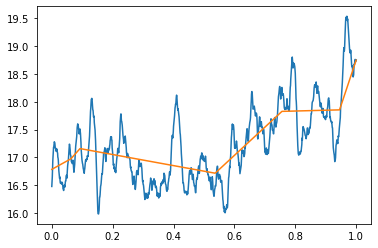

In [9]:
plt.plot(x, temperatures)
plt.plot(x, model(x))

**Question 9.** Train a deep NN with three hidden layers and 10 neurons in each hidden layer. However, now use the sigmoid as the hidden layer activation function. What do you notice?

In [ ]:
# BEGIN SOLUTION
inputs = keras.Input(1)
hidden_1 = keras.layers.Dense(10, activation='sigmoid')(inputs)
hidden_2 = keras.layers.Dense(10, activation='sigmoid')(hidden_1)
hidden_3 = keras.layers.Dense(10, activation='sigmoid')(hidden_2)
outputs = keras.layers.Dense(1, activation='linear')(hidden_3)

model = keras.Model(inputs, outputs)
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=.001),
    loss=keras.losses.MeanSquaredError()
)
model.fit(x, temperatures, epochs=1000)
# END SOLUTION

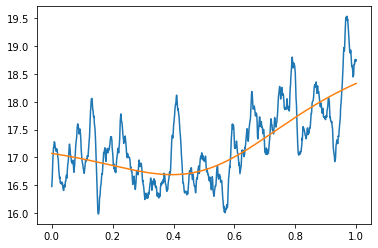

In [11]:
plt.plot(x, temperatures)
plt.plot(x, model(x))

_Type your answer here, replacing this text._

**Solution**: It appears that by using a sigmoid activation, the optimization does not get stuck in the same local minimum as when the ReLU is used. The solution is more easily non-linear.

## Arithmetic

Since neural networks are universal approximators, we can train a neural network to do simple things, like multiply two numbers.

Is this useful? Not really. But it is fun to see a NN learn its time tables.

**Question 10.** The data below can be used as a training set to teach a deep NN to multiply numbers. `X` contains 2000 pairs of numbers between 0 and 5, and `y` contains the product of each pair.

In [12]:
X = np.random.uniform(0, 5, size=(2000, 2))
y = np.prod(X, axis=1)

Design and train a deep network that is able to predict the product of two numbers given as input.

In [ ]:
# BEGIN SOLUTION
inputs = keras.Input(2)
hidden_1 = keras.layers.Dense(10, activation='relu')(inputs)
hidden_2 = keras.layers.Dense(10, activation='relu')(hidden_1)
hidden_3 = keras.layers.Dense(10, activation='relu')(hidden_2)
outputs = keras.layers.Dense(1, activation='linear')(hidden_3)

model = keras.Model(inputs, outputs)
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=.001),
    loss=keras.losses.MeanSquaredError()
)

model.fit(X, y, epochs=1000)
# END SOLUTION

In [14]:
test_x_1 = 3
test_x_2 = 2
product = float(model(np.array([[test_x_1, test_x_2]])))
product

5.976151466369629

**Question 10**. Train a NN to compute the maximum of two numbers.

In [15]:
X = np.random.uniform(0, 5, size=(2000, 2))
y = np.max(X, axis=1)

In [ ]:
# BEGIN SOLUTION
inputs = keras.Input(2)
hidden_1 = keras.layers.Dense(10, activation='relu')(inputs)
hidden_2 = keras.layers.Dense(10, activation='relu')(hidden_1)
hidden_3 = keras.layers.Dense(10, activation='relu')(hidden_2)
outputs = keras.layers.Dense(1, activation='linear')(hidden_3)

model = keras.Model(inputs, outputs)
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=.001),
    loss=keras.losses.MeanSquaredError()
)

model.fit(X, y, epochs=100)
# END SOLUTION

In [17]:
test_x_1 = 2
test_x_2 = 4
larger = float(model(np.array([[test_x_1, test_x_2]])))
larger

4.023857116699219

**Question 11.** Train a NN to compute the remainder of its input when divided by two.

In [18]:
X = np.random.uniform(0, 6, size=(2000, 1))
y = X % 2

In [ ]:
# BEGIN SOLUTION
inputs = keras.Input(1)
hidden_1 = keras.layers.Dense(10, activation='relu')(inputs)
hidden_2 = keras.layers.Dense(10, activation='relu')(hidden_1)
hidden_3 = keras.layers.Dense(10, activation='relu')(hidden_2)
outputs = keras.layers.Dense(1, activation='linear')(hidden_3)

model = keras.Model(inputs, outputs)
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=.001),
    loss=keras.losses.MeanSquaredError()
)

model.fit(X, y, epochs=1000)
# END SOLUTION

In [20]:
test_x = 3.8
product = float(model(np.array([[test_x]])))
product

1.6618653535842896

In [21]:
xx = np.linspace(0, 6, 100)
yy = np.asarray(model(xx))

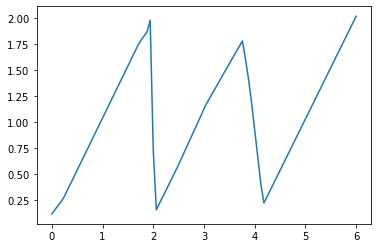

In [22]:
plt.plot(xx, yy)